In [1]:
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import RidgeCV

In [2]:
# 당뇨병 데이터셋 로드
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

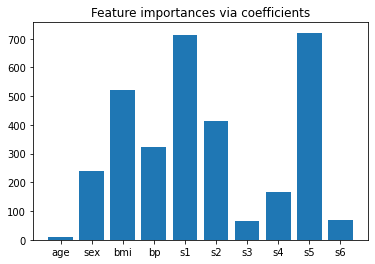

In [3]:
# Ridge 회귀를 사용하여 특성 중요도 계산
ridge = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(X, y)
importance = np.abs(ridge.coef_)
feature_names = np.array(diabetes.feature_names)
# 특성 중요도 시각화
plt.bar(height=importance, x=feature_names)
plt.title("Feature importances via coefficients")
plt.show()

In [4]:
from time import time

from sklearn.feature_selection import SelectFromModel

threshold = np.sort(importance)[-3] + 0.01

tic = time()
sfm = SelectFromModel(ridge, threshold=threshold).fit(X, y)
toc = time()
print(f"Features selected by SelectFromModel: {feature_names[sfm.get_support()]}")
print(f"Done in {toc - tic:.3f}s")

Features selected by SelectFromModel: ['s1' 's5']
Done in 0.003s


In [5]:
from sklearn.feature_selection import SequentialFeatureSelector

tic_fwd = time()
sfs_forward = SequentialFeatureSelector(
    ridge, n_features_to_select=2, direction="forward"
).fit(X, y)
toc_fwd = time()

tic_bwd = time()
sfs_backward = SequentialFeatureSelector(
    ridge, n_features_to_select=2, direction="backward"
).fit(X, y)
toc_bwd = time()

print(
    "Features selected by forward sequential selection: "
    f"{feature_names[sfs_forward.get_support()]}"
)
print(f"Done in {toc_fwd - tic_fwd:.3f}s")
print(
    "Features selected by backward sequential selection: "
    f"{feature_names[sfs_backward.get_support()]}"
)
print(f"Done in {toc_bwd - tic_bwd:.3f}s")

Features selected by forward sequential selection: ['bmi' 's5']
Done in 0.278s
Features selected by backward sequential selection: ['bmi' 's5']
Done in 0.734s


In [6]:
import numpy as np

from sklearn.datasets import load_breast_cancer
# 유방암 데이터셋 로드
breast_cancer_data = load_breast_cancer()
X, y = breast_cancer_data.data, breast_cancer_data.target
feature_names = np.array(breast_cancer_data.feature_names)
print(breast_cancer_data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

for tol in [-1e-2, -1e-3, -1e-4]:
    start = time()
    feature_selector = SequentialFeatureSelector(
        LogisticRegression(),
        n_features_to_select="auto",
        direction="backward",
        scoring="roc_auc",
        tol=tol,
        n_jobs=2,
    )
    model = make_pipeline(StandardScaler(), feature_selector, LogisticRegression())
    model.fit(X, y)
    end = time()
    print(f"\ntol: {tol}")
    print(f"Features selected: {feature_names[model[1].get_support()]}")
    print(f"ROC AUC score: {roc_auc_score(y, model.predict_proba(X)[:, 1]):.3f}")
    print(f"Done in {end - start:.3f}s")


tol: -0.01
Features selected: ['worst perimeter']
ROC AUC score: 0.975
Done in 21.077s

tol: -0.001
Features selected: ['radius error' 'fractal dimension error' 'worst texture'
 'worst perimeter' 'worst concave points']
ROC AUC score: 0.997
Done in 19.169s

tol: -0.0001
Features selected: ['mean area' 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'radius error' 'perimeter error'
 'area error' 'smoothness error' 'symmetry error'
 'fractal dimension error' 'worst radius' 'worst texture'
 'worst perimeter' 'worst area' 'worst concave points' 'worst symmetry'
 'worst fractal dimension']
ROC AUC score: 0.998
Done in 15.595s
